<a href="https://colab.research.google.com/github/AshishSawant22/Ash/blob/main/Simple_Lin_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
  import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing Dataset 

In [2]:
dataset= pd.read_csv("/content/delivery_time.csv")

In [3]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#Dependent & Independent variables

In [5]:
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,1].values

In [ ]:
X


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

#Splitting the dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train

array([[19.83],
       [12.03],
       [ 8.  ],
       [19.  ],
       [17.83],
       [29.  ],
       [19.75],
       [15.35],
       [13.75],
       [18.75],
       [ 9.5 ],
       [18.11],
       [24.  ],
       [21.  ],
       [14.88],
       [16.68]])

In [9]:
X_test

array([[17.9 ],
       [11.5 ],
       [21.5 ],
       [13.5 ],
       [10.75]])

In [10]:
y_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [11]:
y_test

array([10,  3,  5,  4,  4])

#Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.fit_transform(X_test)

In [14]:
X_train

array([[ 0.49073099],
       [-1.0472707 ],
       [-1.84190491],
       [ 0.32707183],
       [ 0.09637158],
       [ 2.29886887],
       [ 0.47495661],
       [-0.39263408],
       [-0.70812161],
       [ 0.27777691],
       [-1.54613535],
       [ 0.1515819 ],
       [ 1.31297035],
       [ 0.72143124],
       [-0.48530855],
       [-0.13038508]])

In [15]:
 X_test

array([[ 0.70349054],
       [-0.86526885],
       [ 1.5859177 ],
       [-0.37503154],
       [-1.04910784]])

#ML Algorithm- Simple Linear Regression

In [16]:
#Fitting Simple Linear Regression to Training set
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

#Predicting the test results

In [17]:
y_pred= regressor.predict(X_test  )

In [18]:
y_test

array([10,  3,  5,  4,  4])

In [19]:
y_pred

array([8.01241669, 4.63978016, 9.90952474, 5.69372908, 4.24454932])

#Measuring Accuracy

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
mae= mean_absolute_error  (y_true= y_test, y_pred=y_pred )
mse= mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse=mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
mape= mean_absolute_percentage_error  (y_true=y_test, y_pred=y_pred)
rsquare= r2_score(y_true=y_test, y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAPE:",mape)
print("Adj.Rsquare:", rsquare)




MAE: 2.0950333225715405
MSE: 6.734264427677483
RMSE: 2.5950461320904266
MAPE: 0.442365253443345
Adj.Rsquare: -0.09322474475283826


#Data Visualization

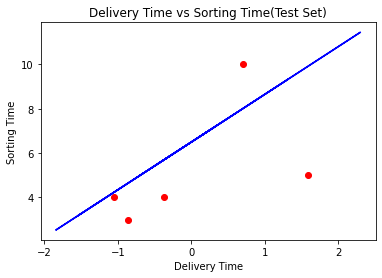

In [22]:
plt.scatter(X_test, y_test, color= 'Red')
plt.plot(X_train, regressor.predict(X_train), color='Blue')
plt.title('Delivery Time vs Sorting Time(Test Set)')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()